In [604]:
#from urllib.request import urlopen
#from datetime import datetime
#import time
#import json
import pandas as pd
import numpy as np

In [605]:
import yfinance as yf
#interval: data interval (intraday data cannot extend last 60 days) 
# Valid intervals are: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
df = yf.download('BTC-USD', '2010-06-01', interval='1d')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-07-21,23233.201172,23388.322266,22431.148438,23164.628906,23164.628906,33631012204
2022-07-22,23163.751953,23671.927734,22603.416016,22714.978516,22714.978516,31421555646
2022-07-23,22706.984375,22977.210938,22002.910156,22465.478516,22465.478516,24021799169


In [606]:
# add should_buy column based on next interval price 
buy = np.array([])
for i in range(len(df['Close'])-1):
    # if at least 1% up next period, not less than 3% down
    if (df['High'][i+1] > df['Close'][i] * 1.01 and df['Low'][i+1] > df['Close'][i] * 0.97): 
        buy = np.append(buy, 1)
    else:
        buy = np.append(buy, 0)
buy = np.append(buy, 2) # latest row, we don't know next value
df['should_buy'] = buy
    
df

,Open,High,Low,Close,Adj Close,Volume,should_buy
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,1.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,1.0
...,...,...,...,...,...,...,...
2022-07-21,23233.201172,23388.322266,22431.148438,23164.628906,23164.628906,33631012204,1.0
2022-07-22,23163.751953,23671.927734,22603.416016,22714.978516,22714.978516,31421555646,0.0
2022-07-23,22706.984375,22977.210938,22002.910156,22465.478516,22465.478516,24021799169,1.0


In [607]:
from ta import add_all_ta_features
from ta.utils import dropna

# Clean NaN values
#df = dropna(df)

# Add ta features filling NaN values
df = add_all_ta_features(
    df, open="price", high="High", low="Low", close="Close", volume="Volume", fillna=True)


/home/noob/projects/quant/quant/env/lib/python3.9/site-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/home/noob/projects/quant/quant/env/lib/python3.9/site-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/home/noob/projects/quant/quant/env/lib/python3.9/site-packages/ta/trend.py:938: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_up = pd.Series(index=self._psar.index)
/home/noob/projects/quant/quant/env/lib/python3.9/site-packages/ta/trend.py:939: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_down = pd.Series(index=self._psar.index)


In [608]:
df


,Open,High,Low,Close,Adj Close,Volume,should_buy,volume_adi,volume_obv,volume_cmf,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0.0,-7.924336e+06,21056800,-0.376331,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,457.334015,-96.340901,0.000000,0.000000
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,0.0,-2.454020e+07,-13426400,-0.441847,...,-0.576839,-0.115368,-0.461471,4.857081,0.971416,3.885665,444.100963,-7.192558,-7.464335,-7.192558
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,1.0,-4.448391e+07,-51346100,-0.475969,...,-1.557290,-0.403752,-1.153538,9.351817,2.647496,6.704321,421.167562,-6.984265,-7.240151,-13.674475
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.0,-3.937687e+07,-14482500,-0.302148,...,-2.067514,-0.736505,-1.331009,12.071627,4.532323,7.539305,415.047092,3.573492,3.511124,-10.589639
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,1.0,-5.037763e+07,-41062600,-0.321074,...,-2.636293,-1.116462,-1.519831,10.907564,5.807371,5.100193,407.050081,-2.465854,-2.496766,-12.794369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21,23233.201172,23388.322266,22431.148438,23164.628906,23164.628906,33631012204,1.0,4.201866e+12,1676740029682,0.165496,...,0.568859,-1.846900,2.415759,7.876424,3.164422,4.712003,21296.747779,-0.288844,-0.289262,4965.144545
2022-07-22,23163.751953,23671.927734,22603.416016,22714.978516,22714.978516,31421555646,0.0,4.177005e+12,1645318474036,0.113526,...,0.842541,-1.309012,2.151553,6.708047,3.873147,2.834900,21560.986628,-1.941108,-1.960195,4866.824635
2022-07-23,22706.984375,22977.210938,22002.910156,22465.478516,22465.478516,24021799169,1.0,4.175793e+12,1621296674867,0.107040,...,0.955382,-0.856133,1.811515,3.896941,3.877906,0.019036,21665.622104,-1.098394,-1.104471,4812.269323


In [609]:
df = df.drop(columns=['Volume', 'Open', 'High', 'Low', 'Close', 'Adj Close'])
df = df.iloc[20: , :] # remove first
df.drop(df.tail(1).index,inplace=True)
# Split data into X & y
X = df.drop("should_buy", axis=1) # use all columns except target
y = df["should_buy"] # we want to predict y using X

df


,should_buy,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-07,1.0,-1.102698e+08,-168412596,-0.140683,-1.869213e+08,229.509633,-495.295515,3.269368e+06,359.455515,41.847111,...,-7.298439,-5.656606,-1.641833,24.744251,14.962325,9.781926,349.597915,1.850467,1.833554,-26.489830
2014-10-08,1.0,-6.126976e+07,-113676296,-0.049121,-2.921875e+07,541.745011,-490.644286,3.638066e+06,354.215821,43.590115,...,-6.971959,-5.919677,-1.052282,24.043751,16.778610,7.265141,349.724711,4.983236,4.863049,-22.826645
2014-10-09,0.0,-6.213156e+07,-30035192,-0.022241,1.193677e+08,1023.445036,-372.143616,5.591826e+06,353.036183,53.954811,...,-6.373959,-6.010533,-0.363426,27.540522,18.930993,8.609529,349.930143,3.424378,3.367051,-20.183938
2014-10-10,1.0,-7.182316e+07,-73700892,-0.040544,8.070693e+07,-60.315472,-331.630341,2.449813e+06,351.912754,52.205743,...,-5.908522,-5.990131,0.081609,23.674817,19.879758,3.795059,350.386616,-0.948971,-0.953502,-20.941369
2014-10-11,1.0,-7.009443e+07,-60355692,-0.025052,7.058243e+07,-205.846398,-322.257670,-3.871721e+05,350.937878,52.492084,...,-5.460701,-5.884245,0.423544,15.400375,18.983881,-3.583506,350.769584,0.203838,0.203630,-20.780218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-20,0.0,4.183954e+12,1710371041886,0.097019,1.226329e+13,2566.004189,974.597800,1.670501e+09,21410.988772,71.935451,...,-0.003134,-2.450840,2.447705,8.581889,1.986421,6.595468,20944.153188,-0.674241,-0.676524,4979.817303
2022-07-21,1.0,4.201866e+12,1676740029682,0.165496,1.018900e+13,-1974.196097,496.947501,-3.866101e+08,21536.415631,64.780055,...,0.568859,-1.846900,2.415759,7.876424,3.164422,4.712003,21296.747779,-0.288844,-0.289262,4965.144545
2022-07-22,0.0,4.177005e+12,1645318474036,0.113526,6.715038e+12,775.113903,438.444361,-7.070675e+08,21614.043357,63.440600,...,0.842541,-1.309012,2.151553,6.708047,3.873147,2.834900,21560.986628,-1.941108,-1.960195,4866.824635


In [610]:
np.random.seed(42)


In [611]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
# Example use case (requires X & y)
X_train, X_test, y_train, y_test = train_test_split(X, y)




In [612]:
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores


{'KNN': 0.5828651685393258,
 'Logistic Regression': 0.526685393258427,
 'Random Forest': 0.5617977528089888}

In [613]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from timeit import default_timer as timer
"""
start = timer()

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);
print(rs_rf.best_params_)
print(rs_rf.score(X_test, y_test))

end = timer()
print(end - start) # Time in seconds, e.g. 5.38091952400282
"""

'\nstart = timer()\n\n# Different RandomForestClassifier hyperparameters\nrf_grid = {"n_estimators": np.arange(10, 1000, 50),\n           "max_depth": [None, 3, 5, 10],\n           "min_samples_split": np.arange(2, 20, 2),\n           "min_samples_leaf": np.arange(1, 20, 2)}\n\n# Setup random seed\nnp.random.seed(42)\n\n# Setup random hyperparameter search for RandomForestClassifier\nrs_rf = RandomizedSearchCV(RandomForestClassifier(),\n                           param_distributions=rf_grid,\n                           cv=5,\n                           n_iter=20,\n                           verbose=True)\n\n# Fit random hyperparameter search model\nrs_rf.fit(X_train, y_train);\nprint(rs_rf.best_params_)\nprint(rs_rf.score(X_test, y_test))\n\nend = timer()\nprint(end - start) # Time in seconds, e.g. 5.38091952400282\n'

In [614]:
from timeit import default_timer as timer

start = timer()
# Setup random seed
np.random.seed(42)


# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "max_iter": [100, 1000, 10000],
                "solver": ["liblinear"]} #

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True,
                          n_jobs=1)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

print(gs_log_reg.best_params_)
print(gs_log_reg.score(X_test, y_test))

end = timer()
print(end - start) # Time in seconds, e.g. 5.38091952400282

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'C': 0.0001, 'max_iter': 100, 'solver': 'liblinear'}
0.526685393258427
9.335079528042115


In [615]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5)



In [616]:
# All models/estimators have the fit() function built-in
clf.fit(X_train, y_train)



RandomForestClassifier(max_depth=5, min_samples_leaf=19, min_samples_split=18,
                       n_estimators=510)

In [617]:
# Once fit is called, you can make predictions using predict()
y_preds = clf.predict(X_test)

# You can also predict with probabilities (on classification models)
y_probs = clf.predict_proba(X_test)

In [618]:
# View preds
y_preds, 

(array([0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
        1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
        0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
        1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
        0., 

In [619]:
y_test

Date
2019-01-30    0.0
2015-08-27    1.0
2020-07-30    1.0
2021-08-25    0.0
2020-09-20    0.0
             ... 
2016-02-01    0.0
2019-07-12    0.0
2017-06-09    1.0
2021-06-03    0.0
2017-05-01    1.0
Name: should_buy, Length: 712, dtype: float64

In [620]:
print(len(y_test))
print(len(y_preds))
print(sum(y_test))
print(sum(y_preds))

712
712
344.0
398.0


In [621]:
# View probabilities
y_probs

array([[0.5796388 , 0.4203612 ],
       [0.48529442, 0.51470558],
       [0.41955659, 0.58044341],
       ...,
       [0.43867428, 0.56132572],
       [0.48288326, 0.51711674],
       [0.39618346, 0.60381654]])

In [622]:
# All models/estimators have a score() function
clf.score(X_test, y_test)


0.5898876404494382

In [623]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

/home/noob/projects/quant/quant/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


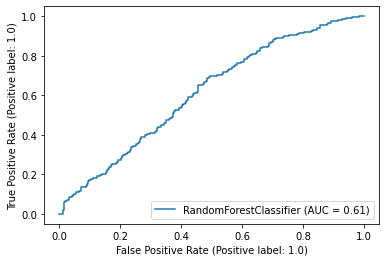

In [624]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf, X_test, y_test);

In [625]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))


[[195 173]
 [119 225]]


In [626]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.62      0.53      0.57       368
         1.0       0.57      0.65      0.61       344

    accuracy                           0.59       712
   macro avg       0.59      0.59      0.59       712
weighted avg       0.59      0.59      0.59       712

